# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

tag = 'mutual_information'

eta_homeo = 0.02

homeo_methods = ['HEH', 'None']
nb_quant = 128
nb_quant = 256
C = 5.
alpha_homeo = 0.0

homeo_methods = ['HAP', 'None']
alpha_homeo = 1.

n_iter = 2**13 + 1

record_num_batches = 2**12
N_show = 120
max_patches = 10
seed = 42
np.random.seed(seed)

opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=n_iter, 
            eta_homeo=eta_homeo, alpha_homeo=alpha_homeo, 
            C=C, nb_quant=nb_quant, P_cum=None, verbose=verbose)

from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname=tag)

Extracting data..loading the data called : data_cache/mutual_information_data
Data is of shape : (262140, 144) - done in 0.25s.


In [4]:
!ls -l {shl.data_cache}/{tag}*
!rm -fr {shl.data_cache}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff    2533678 Mar  5 17:49 data_cache/mutual_information_HAP_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    2533679 Mar  5 18:37 data_cache/mutual_information_None_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  301985408 Mar  5 16:36 data_cache/mutual_information_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (262140, 144)
average of patches =  1.4578306989484052e-05  +/-  0.006638689828201611
average energy of data =  0.029647154513547106 +/- 0.03759209103599952


In [7]:
stick = np.arange(shl.n_dictionary)*nb_quant

indx = np.random.permutation(data.shape[0])[:record_num_batches]
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found data_cache/mutual_information_HAP_dico.pkl: Learning the dictionary with algo = mp 
 Training on 262140 patches
Iteration   1 /   8193 (elapsed time:   0s,   0mn   0s)
Iteration  129 /   8193 (elapsed time:  29s,   0mn  29s)
Iteration  257 /   8193 (elapsed time:  58s,   0mn  58s)
Iteration  385 /   8193 (elapsed time:  113s,   1mn  53s)
Iteration  513 /   8193 (elapsed time:  211s,   3mn  31s)
Iteration  641 /   8193 (elapsed time:  323s,   5mn  23s)
Iteration  769 /   8193 (elapsed time:  433s,   7mn  13s)
Iteration  897 /   8193 (elapsed time:  543s,   9mn   3s)
Iteration  1025 /   8193 (elapsed time:  655s,  10mn  55s)
Iteration  1153 /   8193 (elapsed time:  765s,  12mn  45s)
Iteration  1281 /   8193 (elapsed time:  875s,  14mn  35s)
Iteration  1409 /   8193 (elapsed time:  985s,  16mn  25s)
Iteration  1537 /   8193 (elapsed time:  1094s,  18mn  14s)
Iteration  1665 /   8193 (elapsed time:  1204s,  20mn   4s)
Iteration  1793 /   8193 (elapsed time:  1314s,  21mn  54

Iteration  7809 /   8193 (elapsed time:  29307s,  488mn  27s)
Iteration  7937 /   8193 (elapsed time:  29360s,  489mn  20s)
Iteration  8065 /   8193 (elapsed time:  29415s,  490mn  15s)
Iteration  8193 /   8193 (elapsed time:  31219s,  520mn  19s)
done (total time:  31219s,  520.3mn)
done in 31219.69s.
size of dictionary = (number of filters, size of imagelets) =  (529, 144)
average of filters =  7.875696162044372e-05 +/- 0.010110836207529643
average energy of filters =  1.0 +/- 8.795315759899281e-17


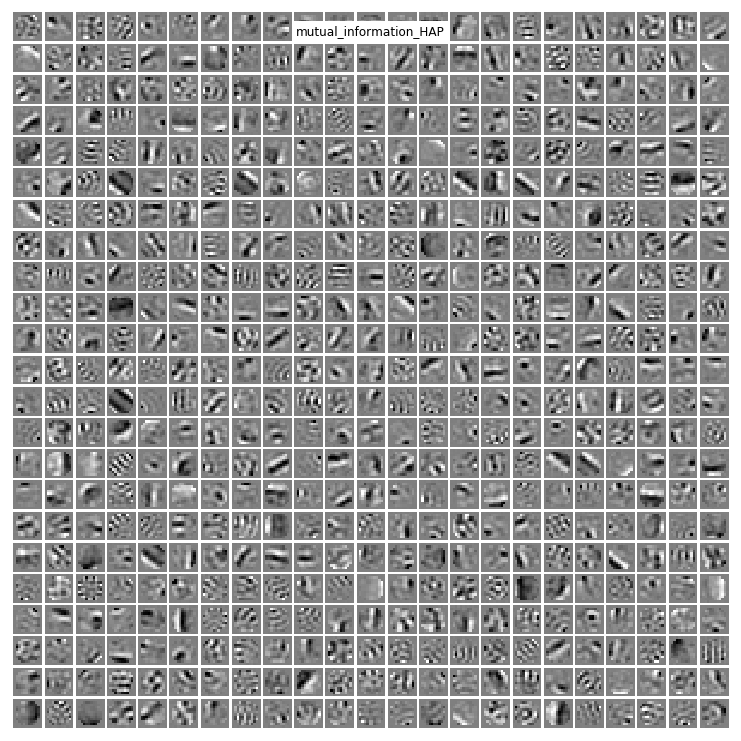

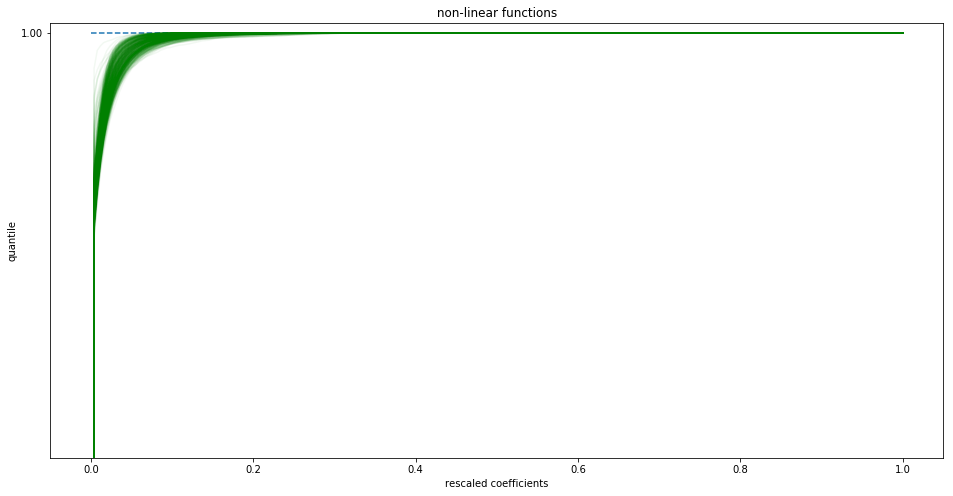

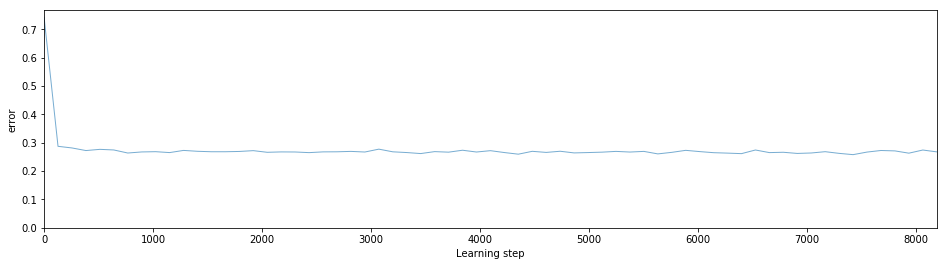

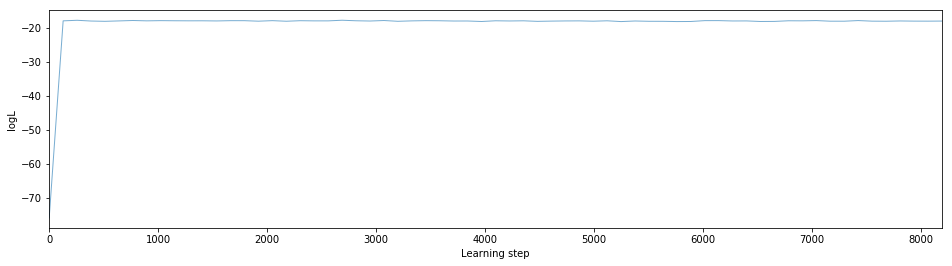

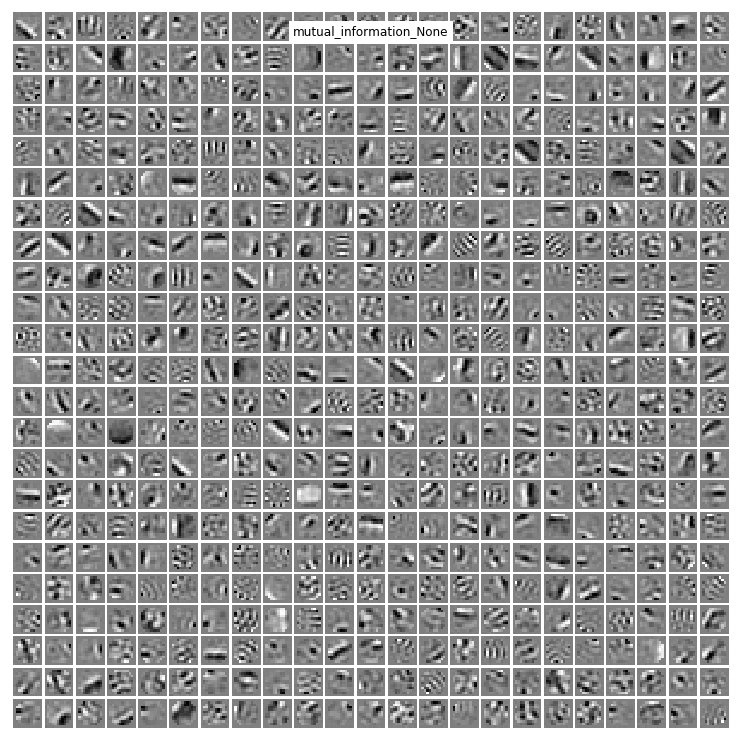

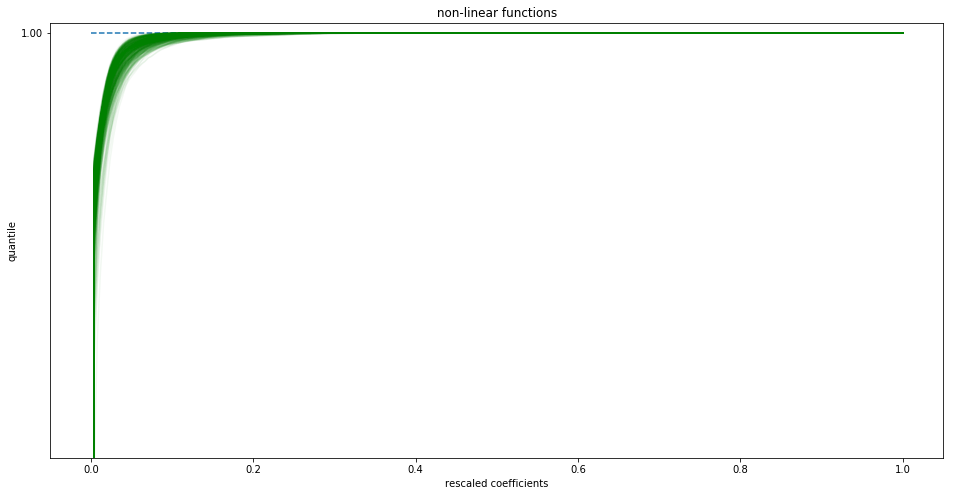

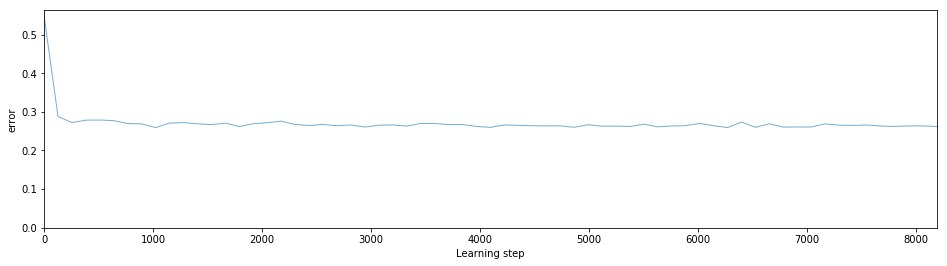

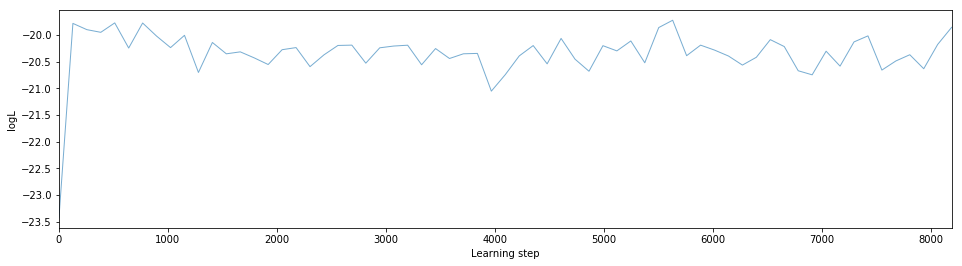

In [8]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method, **opts)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())

## theory



In [9]:
from scipy.stats import binom
# define the mean
rho = shl.l0_sparseness / shl.n_dictionary

# draw binomial samples
sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho

In [10]:
print('Sum of non-zero coefficients', sparse_code_binary.sum(), '~=', shl.l0_sparseness*record_num_batches)
print('average non-zeros', np.count_nonzero(sparse_code_binary, axis=0).mean(), '~=', rho*record_num_batches)
print('activation vector', np.count_nonzero(sparse_code_binary, axis=0))

Sum of non-zero coefficients 61603 ~= 61440
average non-zeros 116.45179584120983 ~= 116.14366729678639
activation vector [116 112 115 110 103 119 136 119 100  99 115 112 137 136 107 108 126 139
 122 127 125 101 125 145 100 111 142 106 125  98 116 119 124 117 105 119
 135 106 133 117 122 145 124 117 127 144 143 112 117 100 114 113 130  93
 113 132 130 115 108 131 123 105 102 117 120  99 116 124 125 125 111 120
  85 111 123 111 115 113 120 116 110 121 131 118 130 119 106 125 127  95
 124  90 116 108 137 103 103 109 106 117 124 113 136  99 127  93 116 114
 118 140 126 115 110 106 122 121 114 120 118 108 116  97 132 140 101 122
 117 118 120 118 108 126 100 123 114 129  88 121 111 115 111 113 136 111
 112  97 118 116 134 115 115 103 112 122 103 130 116 110 110  93 122 131
 106 120 114 120 106 120 117 135 111 134 114 110 127 107 104 129 103 117
 102 116 115 112 119  98 123 108 120  98 140 120 117 108 124  94 107 116
 136 121 125 111 105 112 120 113 141 123 114 118 116 111 133 111 137 103
 12

Shape of co-occurrences (4096, 529, 529)
activation vector [[116   6   4 ...   5   4   5]
 [  6 112   2 ...   5   6   6]
 [  4   2 115 ...   2   1   3]
 ...
 [  5   5   2 ... 132   6   2]
 [  4   6   1 ...   6 116   3]
 [  5   6   3 ...   2   3  92]]
marginal activation vector [3.4102 3.4386 3.4745 3.3176 3.2098 3.5161 4.0151 3.5274 3.0151 3.0662
 3.3422 3.4329 4.3743 4.0038 3.225  3.344  3.7183 4.2684 3.6295 3.8223
 3.5992 3.0019 3.7127 4.3214 3.0832 3.3819 4.2193 3.2647 3.7278 2.9905
 3.6276 3.5501 3.6503 3.569  3.1682 3.6352 4.1323 3.1985 4.0586 3.5331
 3.7353 4.3573 3.6919 3.6408 3.9981 4.4008 4.2911 3.3875 3.6106 3.0208
 3.431  3.4234 3.8828 2.7921 3.5406 3.9698 3.9735 3.5028 3.2873 4.0151
 3.7353 3.1815 3.2023 3.5558 3.811  3.0435 3.5047 3.7221 3.8034 3.7864
 3.3667 3.6408 2.5766 3.4367 3.7032 3.3611 3.3403 3.4008 3.6144 3.4234
 3.3251 3.5955 4.0756 3.5104 3.9981 3.4972 3.0794 3.8015 3.8998 2.8393
 3.7807 2.7013 3.6087 3.3251 4.2476 3.1002 3.1342 3.3629 3.1588 3.603
 3.8374 3.419

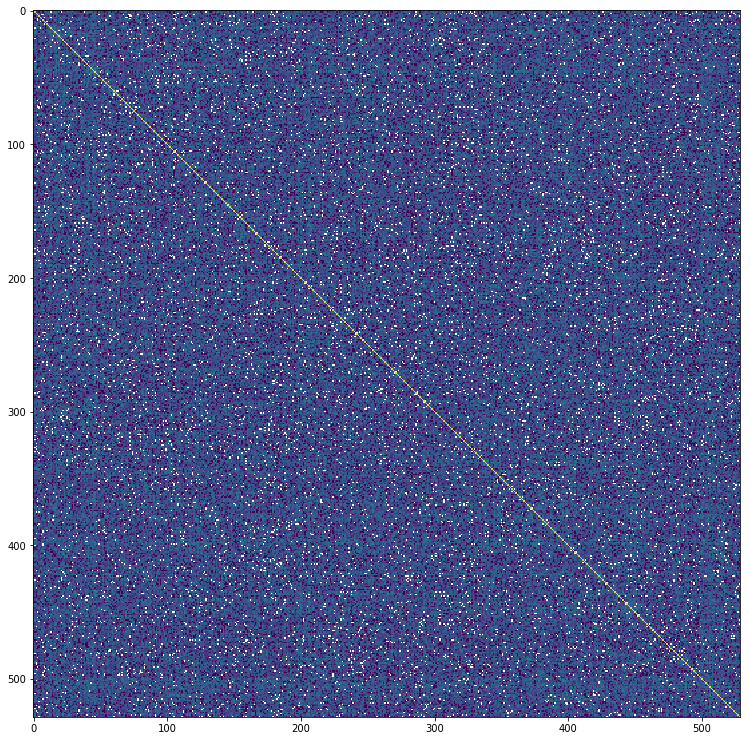

In [11]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
print('Shape of co-occurrences', b_ij.shape)
print('activation vector', np.count_nonzero(b_ij, axis=0))
fig, ax= plt.subplots(figsize=(13, 13))
ax.imshow(np.log(np.count_nonzero(b_ij, axis=0)));
print('marginal activation vector', np.count_nonzero(b_ij, axis=0).mean(axis=-1))

Min-Max -2.1475809852266575e-06 0.0004974971857856611


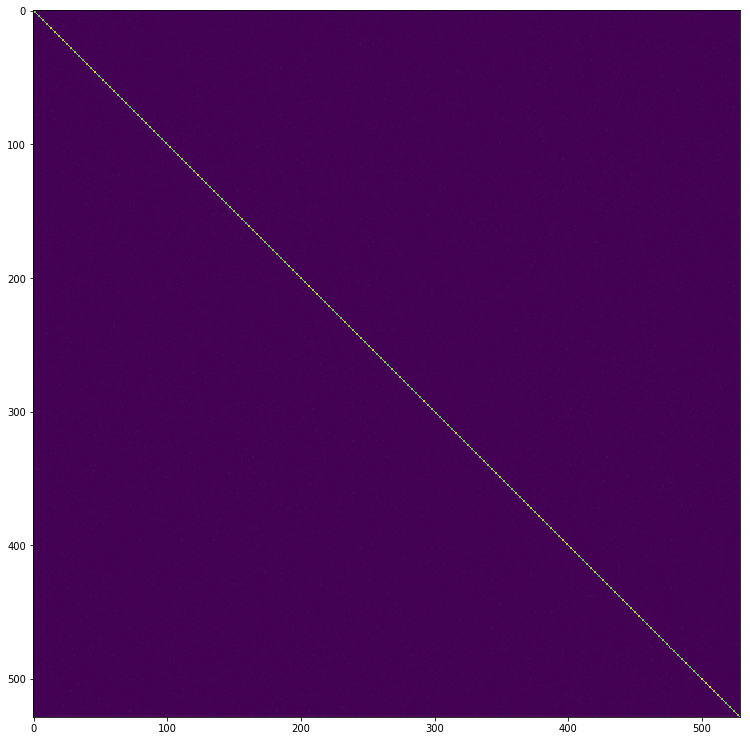

In [12]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
P_ij = 1.*np.count_nonzero(b_ij, axis=0)
P_ij /= P_ij.sum()
P_i = 1.*np.count_nonzero(sparse_code_binary, axis=0)
P_i /= P_i.sum()
fig, ax= plt.subplots(figsize=(13, 13))
MI_ = - (P_ij * np.log( P_i[:, np.newaxis]*P_i[np.newaxis, :] / P_ij  ))
MI_[P_ij==0] = 0
MI_[(P_i[:, np.newaxis]*P_i[np.newaxis, :])==0] = 0
print('Min-Max', MI_.min(), MI_.max())
ax.imshow(MI_);

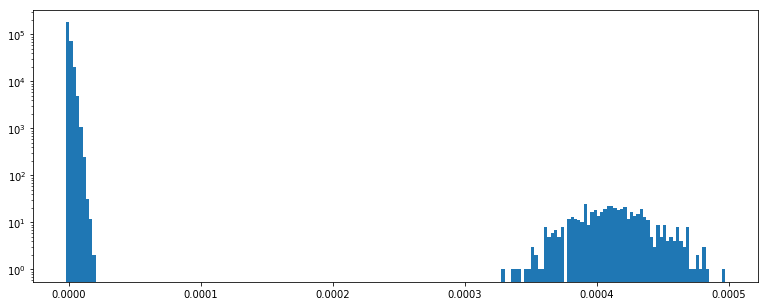

In [13]:
fig, ax= plt.subplots(figsize=(13, 5))
ax.hist(MI_.ravel(), bins=200)
ax.set_yscale('log');

In [14]:
def get_MI(sparse_code):
    b_ij = (sparse_code[:, np.newaxis, :]>0) * (sparse_code[:, :, np.newaxis]>0)
    P_ij = 1.*np.count_nonzero(b_ij, axis=0)
    P_ij /= P_ij.sum()
    P_i = 1.*np.count_nonzero(sparse_code_binary, axis=0)
    P_i /= P_i.sum()
    MI_ = - P_ij * np.log( P_i[:, np.newaxis]*P_i[np.newaxis, :] / P_ij  )
    MI_[P_ij==0] = 0
    MI_[(P_i[:, np.newaxis]*P_i[np.newaxis, :])==0] = 0
    return MI_.sum()
    

In [15]:
for _ in range(10):
    sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho
    MI = get_MI(sparse_code_binary)
    print ('Mutual information for random sample=', MI)

Mutual information for random sample= 0.3091786810702849
Mutual information for random sample= 0.3077754109370307
Mutual information for random sample= 0.3108441865180485
Mutual information for random sample= 0.3040475069150156
Mutual information for random sample= 0.30716123461336
Mutual information for random sample= 0.3127662337494759
Mutual information for random sample= 0.3078822885100353
Mutual information for random sample= 0.3016726072631514
Mutual information for random sample= 0.3037922474972068
Mutual information for random sample= 0.3044237398094936


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [16]:
from shl_scripts.shl_tools import show_data
def print_stats(data, dictionary, sparse_code):
    print(42*'🐒')

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('average std of codewords = ', sparse_code.std())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())


    plt.matshow(sparse_code[:N_show, :])
    plt.show()
    fig, axs = show_data(data[:max_patches, :])
    plt.show()

    patches = sparse_code @ dictionary
    error = data - patches
    
    print('number of codes, size of reconstructed images = ', patches.shape)

    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(patches[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data**2, axis=1))

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    
    SE = np.sqrt(np.mean(error**2, axis=1))

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())
    
    return SD, SE

In [17]:
homeo_methods

['HAP', 'None']

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.002018680780862269
average std of codewords =  0.023415484939942277
l0-sparseness of codewords =  0.02608289520321361  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0033306758145000585


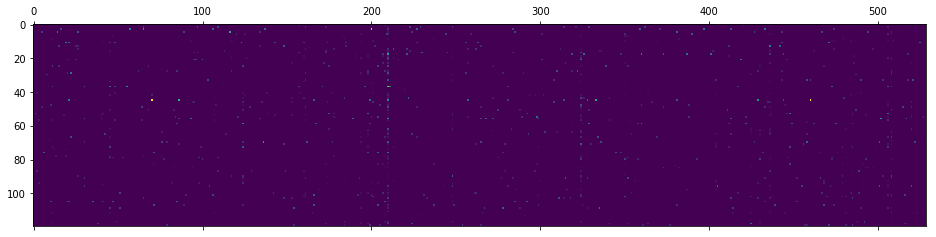

<Figure size 1080x216 with 0 Axes>

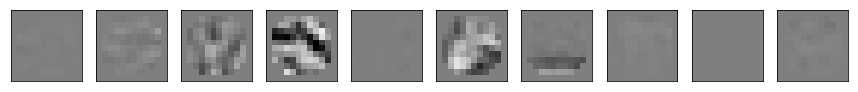

number of codes, size of reconstructed images =  (4096, 144)


<Figure size 1080x216 with 0 Axes>

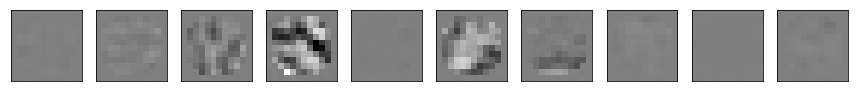

<Figure size 1080x216 with 0 Axes>

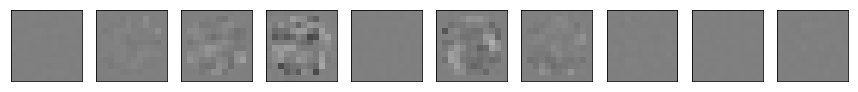

average of data patches =  0.00019789952171710907 +/- 0.006511914226777855
average of residual patches =  -0.0001871849999724375 +/- 0.001175846809054074
median energy of data =  0.01711557550748168
average energy of data =  0.029548699976262173 +/- 0.0376003430780522
average energy of residual =  0.011882146839830176 +/- 0.014112037913071496
median energy of residual =  0.007958827874045914
average gain of coding =  3.279557752245514 +/- 1.7139959028171392
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.002137319531655771
average std of codewords =  0.023625693046796493
l0-sparseness of codewords =  0.028194319323015124  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0013363719426375358


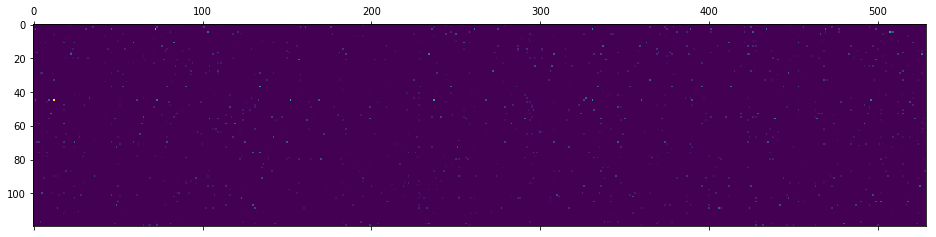

<Figure size 1080x216 with 0 Axes>

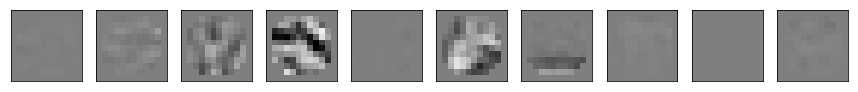

number of codes, size of reconstructed images =  (4096, 144)


<Figure size 1080x216 with 0 Axes>

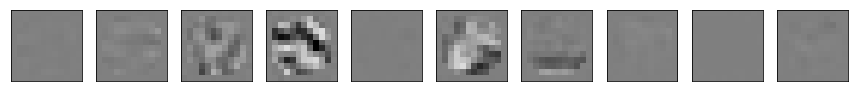

<Figure size 1080x216 with 0 Axes>

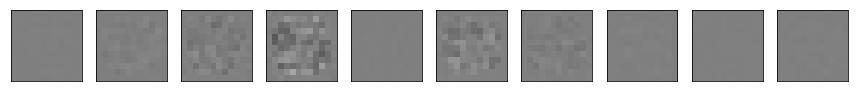

average of data patches =  0.00019789952171710907 +/- 0.006511914226777855
average of residual patches =  -0.00027874247636987075 +/- 0.0019896652442593565
median energy of data =  0.01711557550748168
average energy of data =  0.029548699976262173 +/- 0.0376003430780522
average energy of residual =  0.009582305770049697 +/- 0.011842472182328612
median energy of residual =  0.006510214523878852
average gain of coding =  3.6240406872969384 +/- 1.5427335840686294


In [18]:
from shl_scripts.shl_encode import sparse_encode
sparse_code = {}
for homeo_method in homeo_methods:
    if dico[homeo_method].P_cum is None: 
        gain = np.ones(shl.n_dictionary)
    else:
        gain = None
    sparse_code[homeo_method] = sparse_encode(data[indx, :], dico[homeo_method].dictionary, 
                                 P_cum=dico[homeo_method].P_cum, l0_sparseness = shl.l0_sparseness, C=C, gain=gain)
    SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code[homeo_method])

## measuring the distance to independance 

In [19]:
#fig, ax= plt.subplots(figsize=(13, 5))
for homeo_method in homeo_methods:
    MI = get_MI(sparse_code[homeo_method])
    print ('Mutual information for homeo_method=', homeo_method, 'is', MI)


Mutual information for homeo_method= HAP is 1.3616959647728613
Mutual information for homeo_method= None is 0.7434241303971252


In [20]:
shl.l0_sparseness/shl.n_dictionary

0.02835538752362949

## Version used

In [21]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
pandas 0.22.0
Wed Mar 07 13:22:40 2018 CET